In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [2]:
from google.colab import files
import zipfile
uploaded = files.upload()

Saving archive.zip to archive.zip


In [3]:
import zipfile

with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall('mnist_data')  # You can change the folder name if needed

In [4]:
import os
os.listdir('mnist_data')

['train-labels-idx1-ubyte',
 'train-labels.idx1-ubyte',
 't10k-labels.idx1-ubyte',
 'train-images.idx3-ubyte',
 'train-images-idx3-ubyte',
 't10k-images-idx3-ubyte',
 't10k-labels-idx1-ubyte',
 't10k-images.idx3-ubyte']

In [5]:
import tensorflow as tf

# Load the MNIST dataset from TensorFlow
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
# Normalize the pixel values and reshape for CNN
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [7]:
# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [8]:
# Check the shapes of the data
print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")

Training data shape: (60000, 28, 28, 1), Test data shape: (10000, 28, 28, 1)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model
model = Sequential()

# Add the first convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

# Add the second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Add the third convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))

# Flatten the layers for the fully connected part
model.add(Flatten())

# Add a fully connected layer
model.add(Dense(64, activation='relu'))

# Add the output layer with softmax activation (for classification)
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=64)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 50s 52ms/step - accuracy: 0.8628 - loss: 0.4441 - val_accuracy: 0.9800 - val_loss: 0.0625
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 47s 50ms/step - accuracy: 0.9827 - loss: 0.0575 - val_accuracy: 0.9853 - val_loss: 0.0480
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 51ms/step - accuracy: 0.9885 - loss: 0.0356 - val_accuracy: 0.9893 - val_loss: 0.0320
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 51ms/step - accuracy: 0.9921 - loss: 0.0268 - val_accuracy: 0.9885 - val_loss: 0.0377
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 48s 52ms/step - accuracy: 0.9929 - loss: 0.0212 - val_accuracy: 0.9916 - val_loss: 0.0288
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9883 - loss: 0.0382
Test accuracy: 0.991599977016449


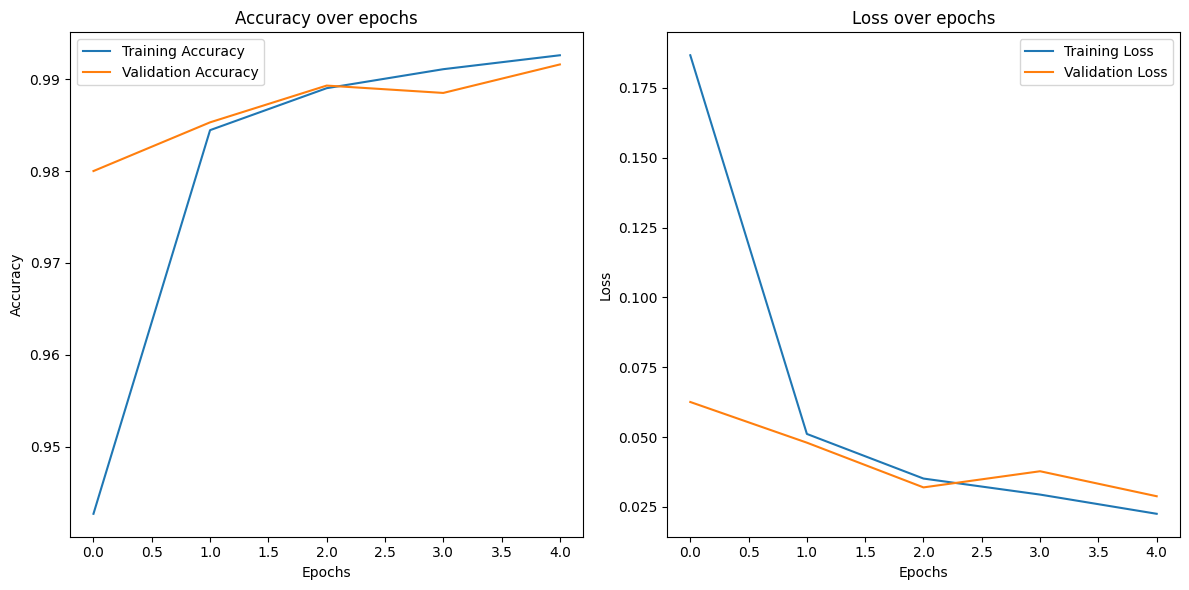

In [11]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load an image (replace 'your_image.png' with the path to your image)
img = image.load_img('Test Subject 1.png', target_size=(28, 28), color_mode='grayscale')

# Convert the image to an array
img_array = image.img_to_array(img)

# Normalize the image
img_array = img_array / 255.0

# Reshape the image for the model
img_array = np.reshape(img_array, (1, 28, 28, 1))

# Predict the class
predictions = model.predict(img_array)
predicted_label = np.argmax(predictions)

print(f"Predicted label: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Predicted label: 8


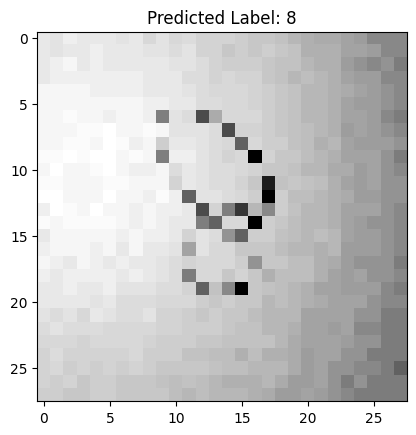

In [14]:
import matplotlib.pyplot as plt

# Load the image again to display it
img = image.load_img('Test Subject 1.png', target_size=(28, 28), color_mode='grayscale')
img_array = image.img_to_array(img)

# Display the original image
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f"Predicted Label: {predicted_label}")
plt.show()
